In [1]:
# import basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("paper", font_scale = 2)
color = sns.color_palette("pastel")


# Attribute Information:

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict: either as a continuous value or as a classification problem.

#### Name / Data Type / Measurement Unit / Description
-----------------------------
* Sex / nominal / -- / M, F, and I (infant)
* Length / continuous / mm / Longest shell measurement
* Diameter / continuous / mm / perpendicular to length
* Height / continuous / mm / with meat in shell
* Whole weight / continuous / grams / whole abalone
* Shucked weight / continuous / grams / weight of meat
* Viscera weight / continuous / grams / gut weight (after bleeding)
* Shell weight / continuous / grams / after being dried
* Rings / integer / -- / +1.5 gives the age in years


### Your challenge
##### Create a report that covers the following:

* How does weight change with age for each of the three sex categories?
* Can you estimate an abalone's age using its physical characteristics?
* Investigate which variables are better predictors of age for abalones.

In [2]:
# import data and check the head
df = pd.read_csv('abalone.csv')
df.head()

,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [3]:
# check the dimensions of the data
df.shape

(4177, 10)

In [4]:
# check the data types and other information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         4177 non-null   object 
 1   length      4177 non-null   float64
 2   diameter    4177 non-null   float64
 3   height      4177 non-null   float64
 4   whole_wt    4177 non-null   float64
 5   shucked_wt  4177 non-null   float64
 6   viscera_wt  4177 non-null   float64
 7   shell_wt    4177 non-null   float64
 8   rings       4177 non-null   int64  
 9   age         4177 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 326.5+ KB


In [5]:
# summary statistics of the data
df.describe()

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


In [6]:
# check for duplicated values
df.duplicated().sum()

0

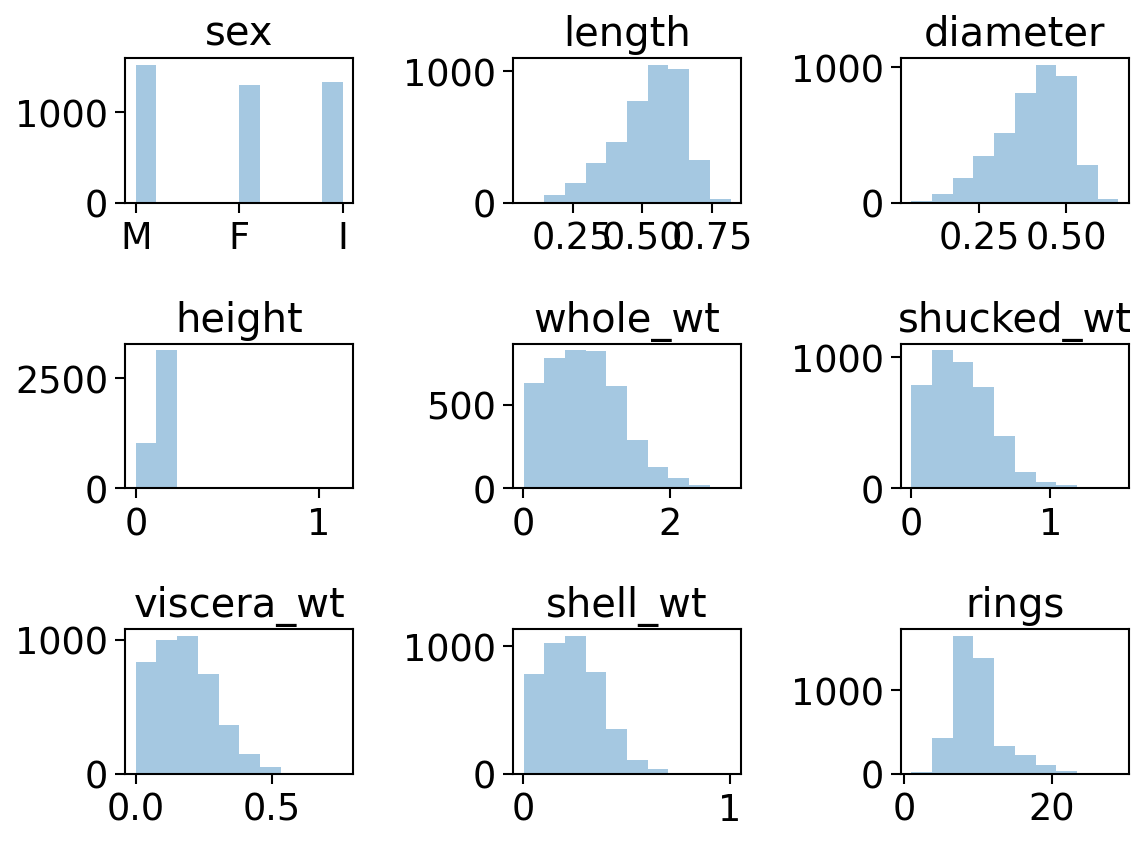

In [7]:
fig, axes = plt.subplots(3, 3, figsize=(8, 6), dpi=150)
for idx, ax in enumerate(axes.flatten()):
       # print(df[df.columns[idx]])
        ax.hist(df[df.columns[idx]], alpha=.4)
        ax.set_title(df.columns[idx])
plt.tight_layout()

Text(0.5, 0, '')

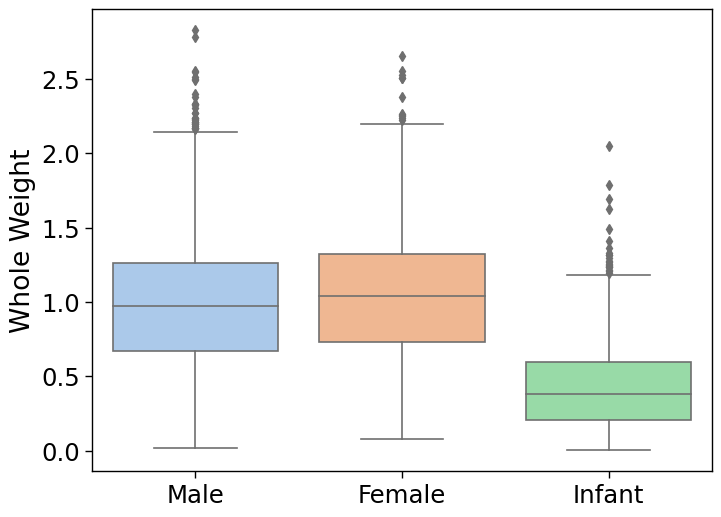

In [8]:
# view the differences in abalone weight between the sexes
plt.figure(figsize=(8, 6), dpi=100);
sns.boxplot(x='sex', y='whole_wt', data=df,
            palette = color[:4]);
plt.xticks([0,1,2], ['Male','Female' ,'Infant']);
plt.ylabel('Whole Weight')
plt.xlabel('')

> Observations
* The *Infants* have lower median weight than the the *Males* and the *Females*
* The weights of the *Males* and *Females* are comparable

C:\Users\OluBunmi\AppData\Local\Temp\ipykernel_21324\1751231584.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask= np.triu(df.corr())
C:\Users\OluBunmi\AppData\Local\Temp\ipykernel_21324\1751231584.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True,


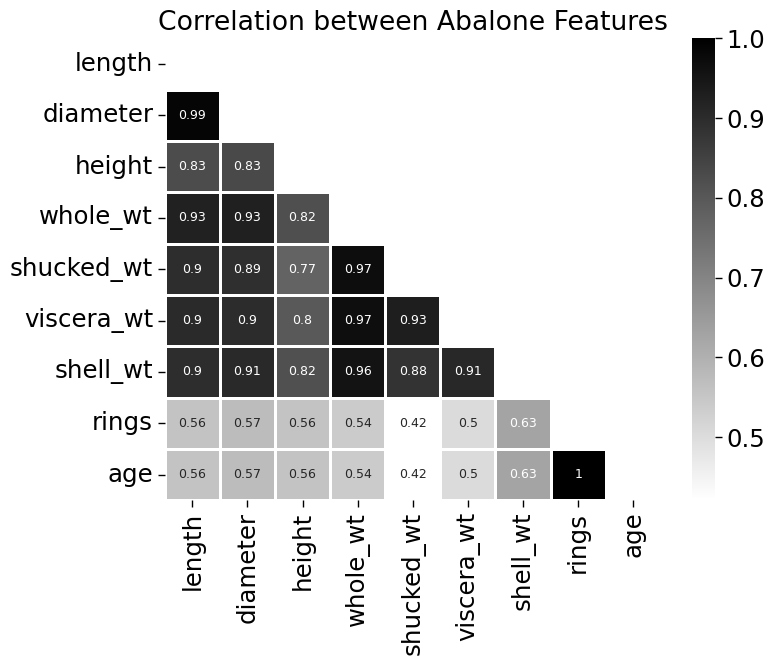

In [9]:
# Create a heatmap to show he correlation between the features of the abalone

mask= np.triu(df.corr())
plt.figure(figsize=(8, 6), dpi=100)
sns.heatmap(df.corr(), annot=True, 
            annot_kws = {'fontsize': 9}, 
            cmap='binary',
            linewidth = 2,
            mask = mask)
plt.title('Correlation between Abalone Features');

> Observations
* The `Rings`*are perfectly correlated to the `Age` of the abalones.
* The other features are have only minor correlations to the `Age` of the abalones.

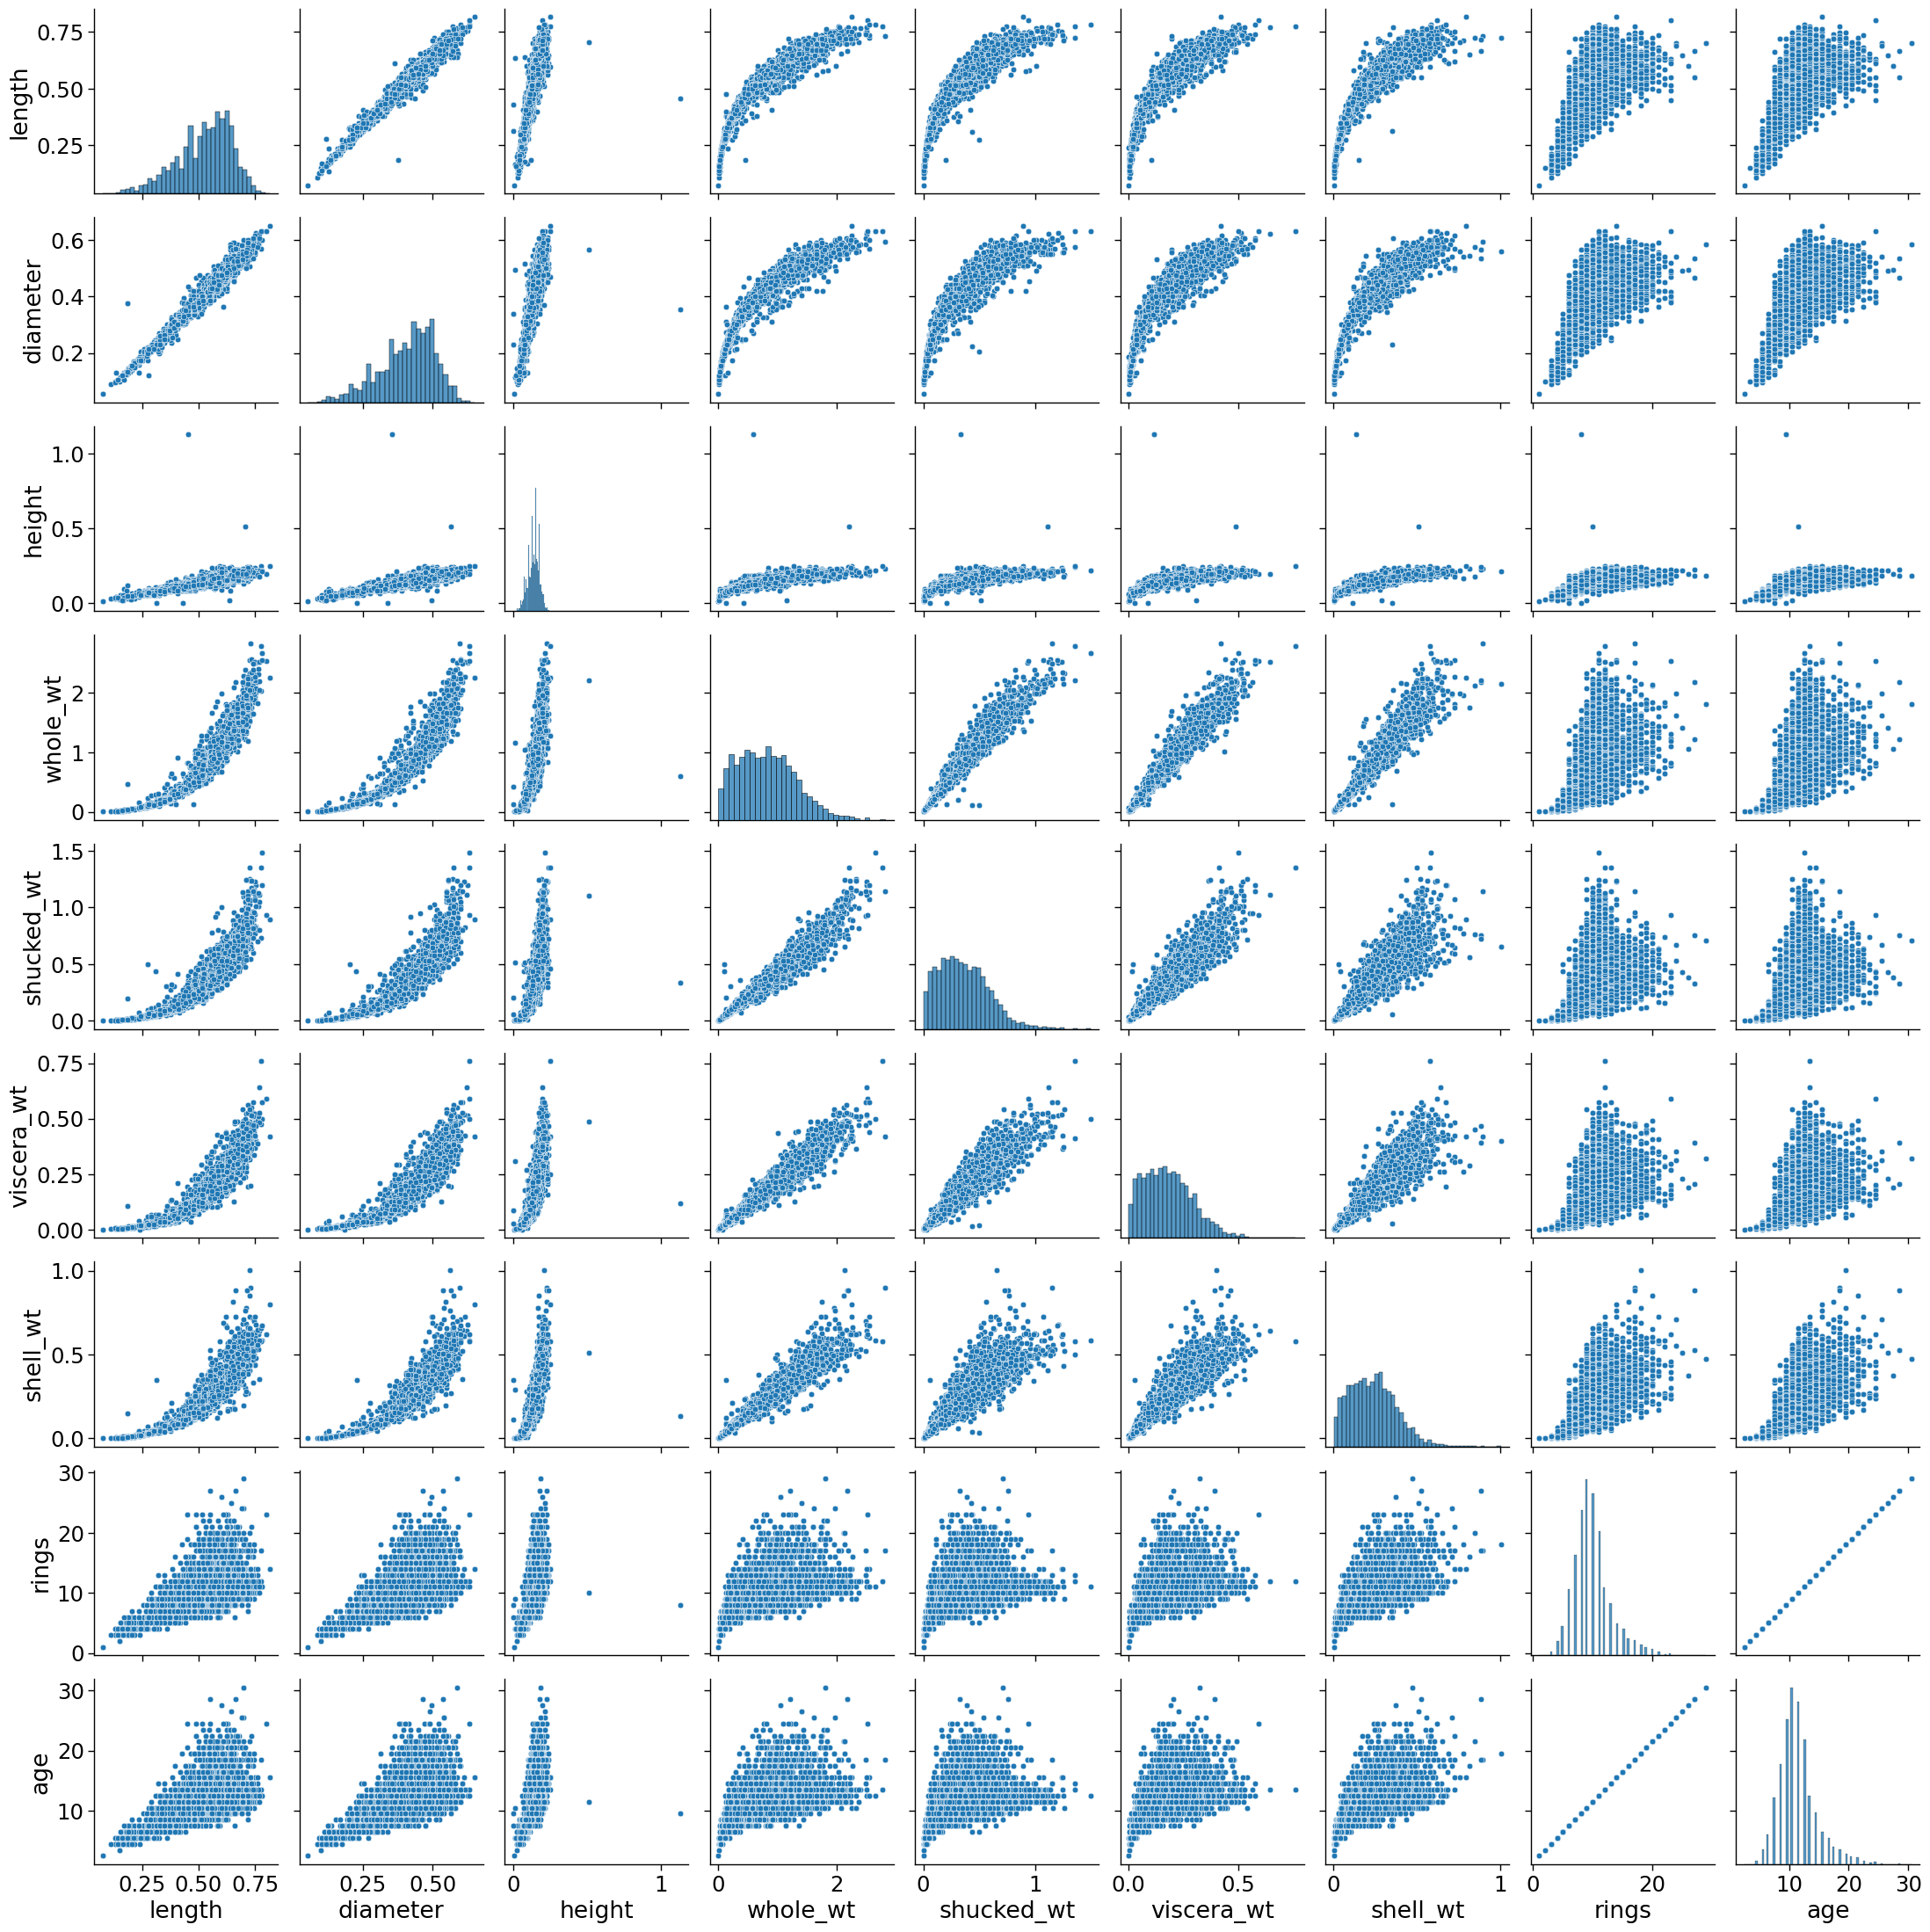

In [10]:
sns.pairplot(df)

## How does weight change with age for each of the three sex categories?

In [11]:
# create a function for visualizing the relationships between variable

def scatter_plt(x, y, x_label, y_label, hue="", data=""):
    plt.figure(figsize=(12, 8), dpi=100)
    sns.lmplot(x=x, y=y, hue=hue, data=data,
                    palette = color[:4],
                    height=8,
                    scatter_kws={"s": 100, 'alpha': 0.5})
    plt.xlabel(x_label)
    plt.ylabel(y_label)

<Figure size 1200x800 with 0 Axes>

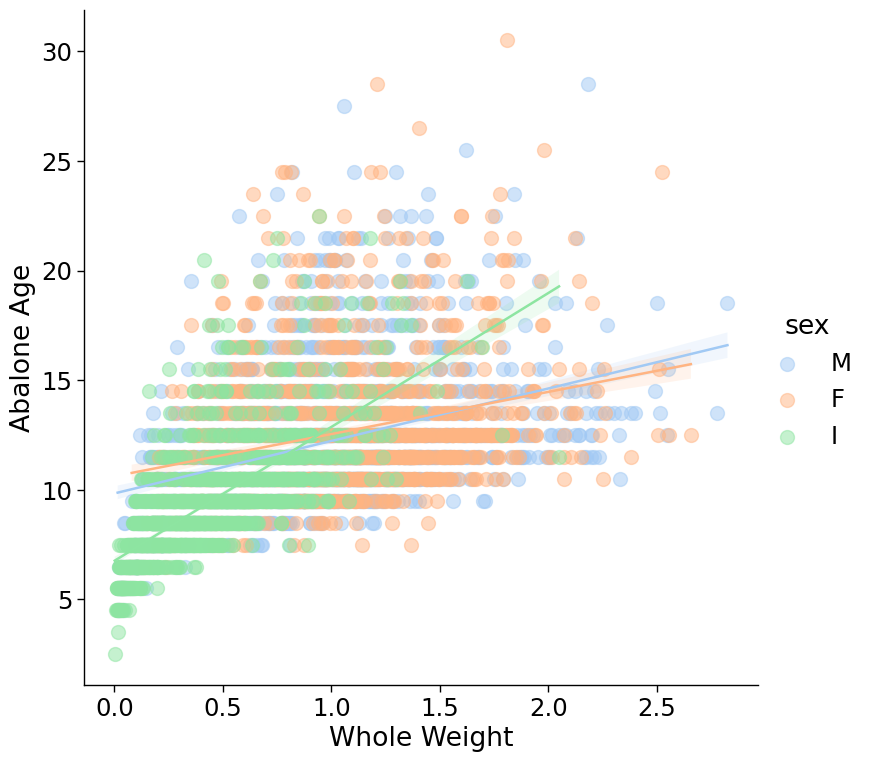

In [12]:
# What the relationship between abalone weight and age

scatter_plt('whole_wt','age' , 'Whole Weight','Abalone Age',  'sex', df)

> Observations
* Whole weight increases with age in the *Infant* sex group
* The is no clear rlationship between the age and whole weights in abalones for the *Male* and *Female* groups.
* The *Male* and *Female* abalones have the highest variation in theri weights between ages 10 and 15 years.

* What could be the cause of these variations at these age range.

<Figure size 1200x800 with 0 Axes>

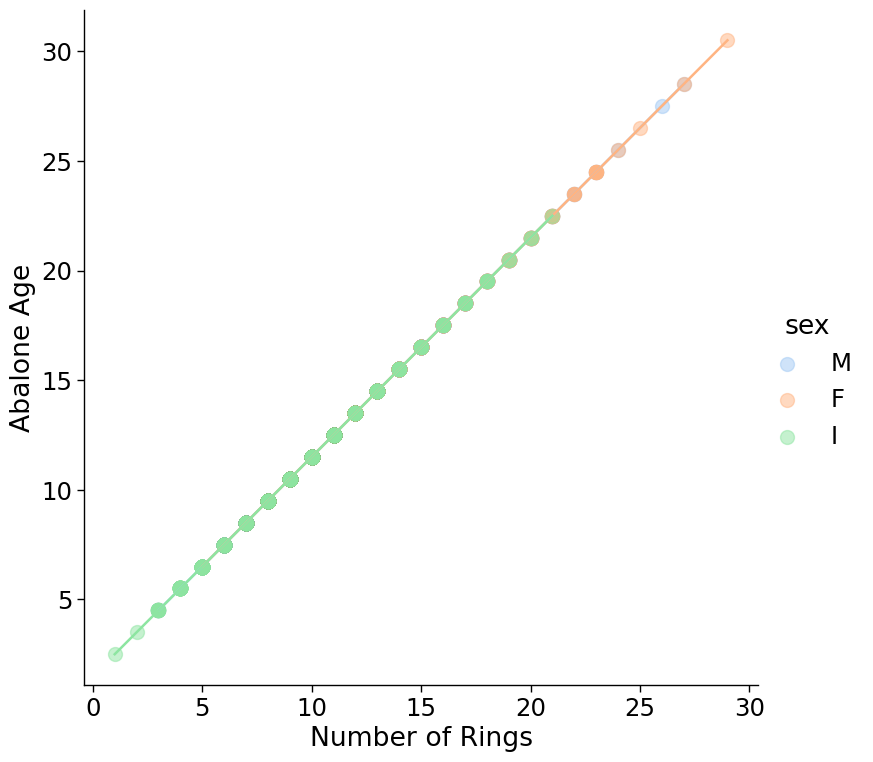

In [13]:
#Relationship between number of righs on the abalone shell and the abalones age
scatter_plt('rings', 'age', 'Number of Rings', 'Abalone Age',  'sex', df)

> Observations
* There is a clear correlation between the Age of the abalone and the number of rings for all the sexes.
* This indicates that the abalones ages can be predicted using the number of rings that the shell has.

(          shell_wt     rings
 shell_wt  1.000000  0.627574
 rings     0.627574  1.000000,
 [          shell_wt     rings
  shell_wt  1.000000  0.510997
  rings     0.510997  1.000000,
            shell_wt     rings
  shell_wt  1.000000  0.405907
  rings     0.405907  1.000000,
            shell_wt     rings
  shell_wt  1.000000  0.725436
  rings     0.725436  1.000000])

<Figure size 1200x800 with 0 Axes>

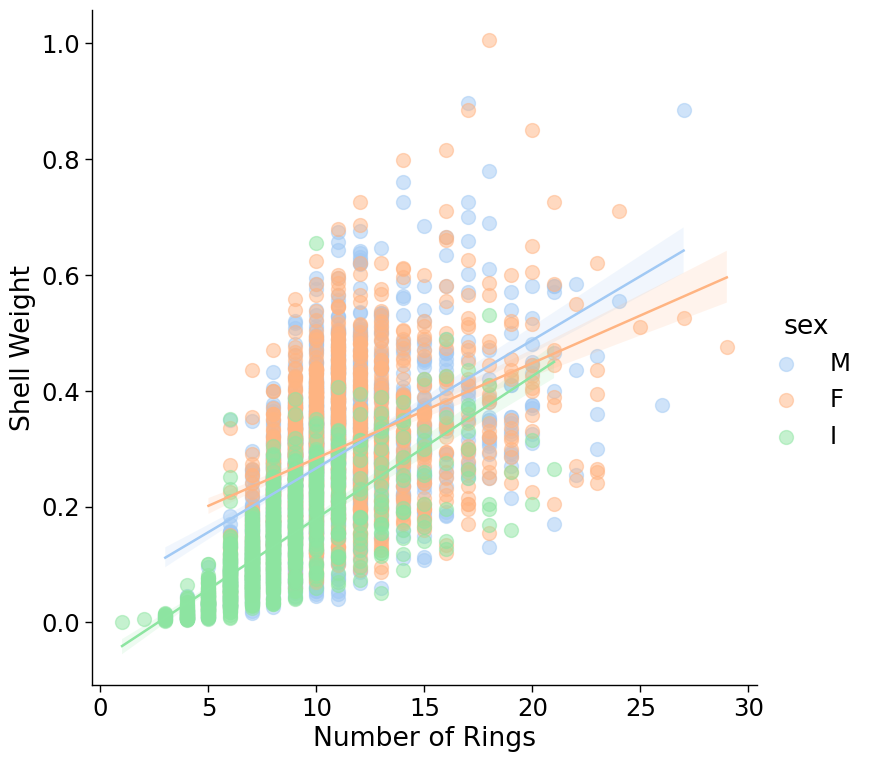

In [14]:
scatter_plt('rings', 'shell_wt', 'Number of Rings', 'Shell Weight', 'sex', df)

#Correlation between shell weight and number of rings, and correlation between shell weight and number of rings for individual sexes
df[['shell_wt', 'rings']].corr(), [df[df.sex == x][['shell_wt', 'rings']].corr() for x in ['M', 'F', 'I']]

> Observations
* The is a low positive correlation (r=0.63) between the shell weight and the number of rings an abalone has.
* For the *Infant* group the correlation (r = 0.73) increases by 10%, and decreases to r=0.51 and r=0.41 for the *Male* and *Female* groups respectively.

In [15]:
# create a new column to encode the sexes of the abalone
df['sex_encode'] = df.sex.map({'M': 0, 'F': 1, 'I': 2})

In [22]:
# Create X and y matrices
# Since number of rings perfectly predicts the abalone age, 
# we would prefer to predict with the other features of the abalone
X = df.drop(['sex', 'age', 'rings'], axis = 1)
y = df.age

In [23]:
# import ML libraries 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [24]:
#Standardize the predictor matrices
scaler = StandardScaler()
X_train, X_test = scaler.fit_transform(X_train), scaler.fit_transform(X_test)

## PLS Regression

### Can you estimate an abalone's age using its physical characteristics?

Text(0.5, 0, 'Number of components')

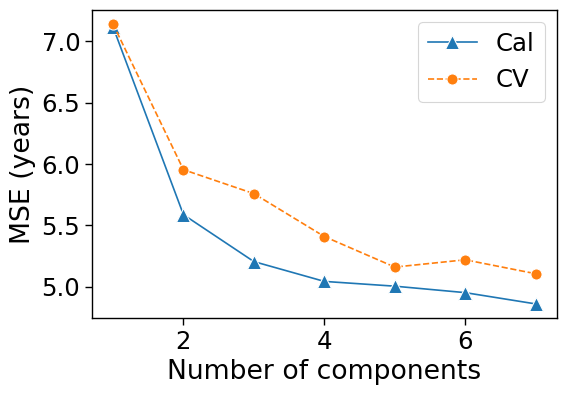

In [25]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_score, cross_validate

# Test for the optimal n_component to use
mse_cal = []
mse_cv = []
for n in range(1, 8):
    pls = PLSRegression(n_components=n)
    pls.fit(X_train, y_train)
    
    mse_cal.append(mean_squared_error(y_train, pls.predict(X_train)))
    predcv = cross_val_score(pls, X_train, y_train, cv=10, scoring = 'neg_mean_squared_error').mean()
    
    mse_cv.append(-predcv)

# plot MSE values for each number of components    
plt.figure(figsize=(6, 4), dpi=100)
sns.lineplot(x =range(1, 8), y = mse_cal, marker='^', label='Cal', ms=10)
sns.lineplot(x =range(1, 8), y = mse_cv, marker='o', label='CV', ms=8, ls='--')
plt.ylabel('MSE (years)')
plt.xlabel('Number of components')
    

In [51]:

# apply n_compnents=4
pls_opt = PLSRegression(n_components=4)     #intialize model

pls_opt.fit(X_train, y_train)       #fit model

cal = pls_opt.predict(X_train).flatten()      #predict training data

predicted = pls_opt.predict(X_test).flatten()     #predict test data

pls_cv = cross_validate(pls_opt, X_train, y_train, cv=10, scoring = ['r2', 'neg_mean_squared_error']) # predict cross-validation scores

#print metrics
print('MSE_Cal')
print(mean_squared_error(y_train, cal))
print('Rsq_Cal')
print(r2_score(y_train, cal))
print('\n')
print('MSE_CV')
print(np.abs(pls_cv['test_neg_mean_squared_error']).mean())
print('Rsq_CV')
print(pls_cv['test_r2'].mean())
print('\n')
print('MSE_Test')
print(mean_squared_error(y_test, predicted))
print('Rsq_Test')
print(r2_score(y_test, predicted))

MSE_Cal
5.043724617822266
Rsq_Cal
0.5232948885742941


MSE_CV
5.4094856146024
Rsq_CV
0.4893851736554188


MSE_Test
4.986564015729155
Rsq_Test
0.5020317328860805


> Observations
* The MSE value (in years) shows that there is an average of 5years deviation of the predicted age of the ablones from the actual age of the abalones
* The R-square also shows that the features used perform poorply at explaining the age of abalones.

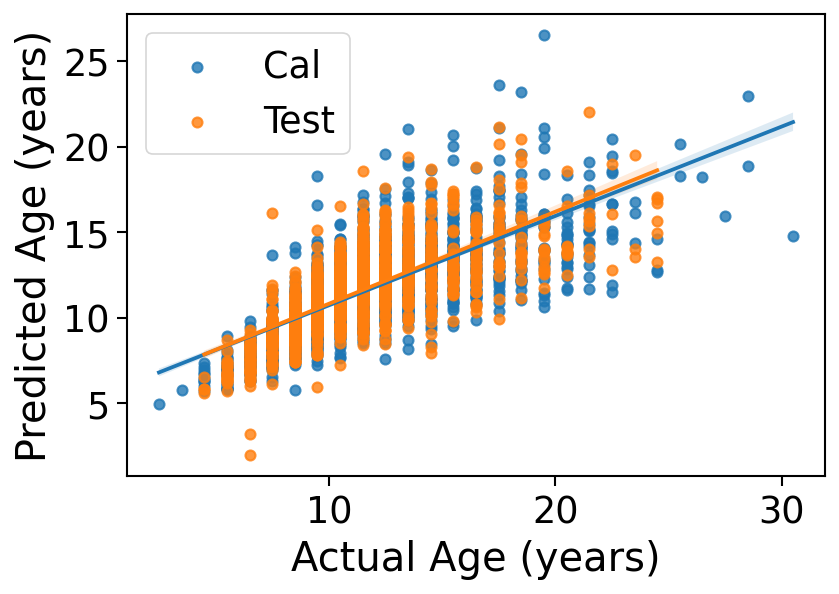

In [36]:
#plot actual vs predicted age of abalones

plt.figure(figsize=(6, 4), dpi=150)
sns.regplot(x=y_train, y=cal, label='Cal')#,, s=15)
sns.regplot(x=y_test, y=predicted, label='Test')#, s=15)

plt.xlabel('Actual Age (years)')
plt.ylabel('Predicted Age (years)')
plt.legend();

## Investigate which variables are better predictors of age for abalones.

Text(0.5, 0, 'Weights (Importance)')

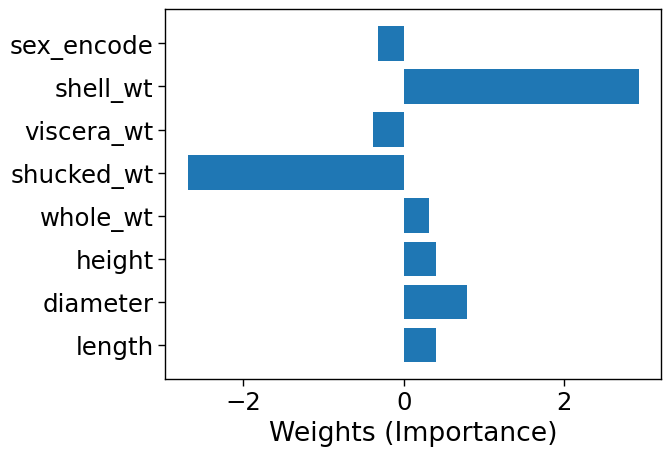

In [53]:
#generate the weights for each feature
coefficients = [item for sublist in pls_opt.coef_ for item in sublist]
plt.barh(width =coefficients, y = X.columns);
plt.xlabel('Weights (Importance)')

> Observations
* The `shell weight` of the abalones has the highest positive weight for predicting the age of abalones i.e. as the `shell weight` increases the abalone is more likely to be older.
* `shucked weight` has an eqully important but inverse effect on abalone age i.e. the lower the `shucked weight`, the older the abalones are likely to be.

## Random Forest Regression

### Can you estimate an abalone's age using its physical characteristics?

Text(0.5, 0, 'Number ofestimators')

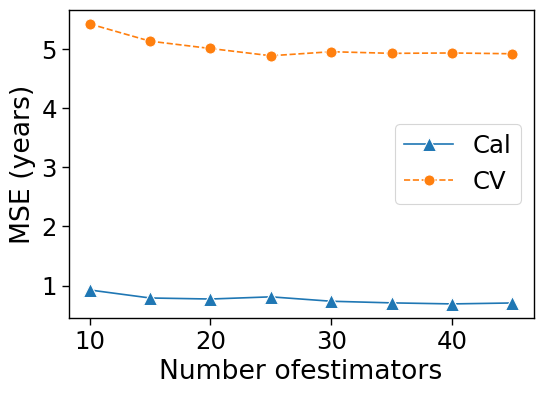

In [54]:
from sklearn.ensemble import RandomForestRegressor

#test for the best number of estimators (trees) for the RandomForest model.
mse_rf_cv = []
mse_rf = []
for n in range(10, 50, 5):
    rf = RandomForestRegressor(n_estimators=n)
    rf.fit(X_train, y_train)
    
    mse_rf.append(mean_squared_error(y_train, rf.predict(X_train)))
    predicted = cross_val_score(rf, X_train, y_train, cv=10, scoring = 'neg_mean_squared_error').mean()
    mse_rf_cv.append(-predicted)
    
plt.figure(figsize=(6, 4), dpi=100)
sns.lineplot(x =range(10, 50, 5), y = mse_rf, marker='^', ms=10, label='Cal')
sns.lineplot(x =range(10, 50, 5), y = mse_rf_cv, marker='o', ms=8, ls='--', label='CV')
plt.ylabel('MSE (years)')
plt.xlabel('Number ofestimators')
#plt.ylim(0.00, 0.01)

> Observations
* There is no clear 'elbow' for the optimal number of estimators. We settle for 30 estimators.

In [121]:
#RF model and prediction

rf = RandomForestRegressor(n_estimators=25)        #initialize the model
rf.fit(X_train, y_train)                            # fit model
rf_cal = rf.predict(X_train)                        #predict the train data
rf_pred = rf.predict(X_test)                        #predict test data
rf_cv = cross_validate(rf, X_train, y_train, cv=10, scoring = ['r2', 'neg_mean_squared_error'])     #cross-validation

In [125]:
#print metrics

print('MSE_Cal')
print(mean_squared_error(y_train, rf_cal).round(4))
print('Rsq_Cal')
print(r2_score(y_train, rf_cal).round(4))
print('\n')
print('MSE_CV')
print(np.abs(rf_cv['test_neg_mean_squared_error']).mean().round(4))
print('Rsq_CV')
print(rf_cv['test_r2'].mean().round(4))
print('\n')
print('MSE_Test')
print(mean_squared_error(y_test, rf_pred).round(4))
print('Rsq_Test')
print(r2_score(y_test, rf_pred).round(4))

MSE_Cal
0.7263
Rsq_Cal
0.9314


MSE_CV
4.7942
Rsq_CV
0.5432


MSE_Test
5.1062
Rsq_Test
0.4901


> Observations
* The R^2 values for the age prediction are very comparable.
* Although there is a order of magnitude difference between the training and CV, and the Test(Validation), the MSE values are so low that this doesnt not pose of problem to the generalizability of the model.

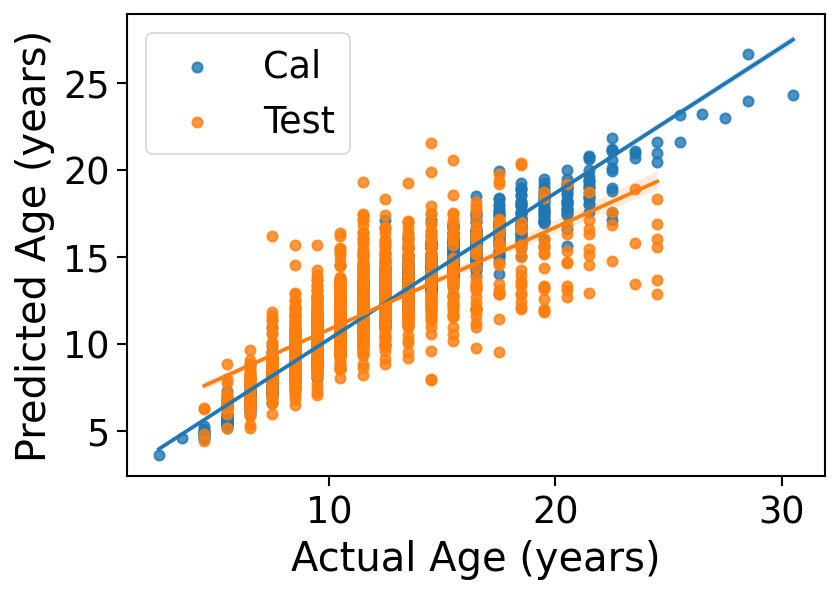

In [48]:
# Actual vs Predicted Age

plt.figure(figsize=(6, 4), dpi=150)
sns.regplot(x=y_train, y=rf_cal, label='Cal')#,, s=15)
sns.regplot(x=y_test, y=rf_pred, label='Test')#, s=15)
plt.xlabel('Actual Age (years)')
plt.ylabel('Predicted Age (years)')
plt.legend();

## Investigate which variables are better predictors of age for abalones.

Text(0.5, 0, 'Feature Importance')

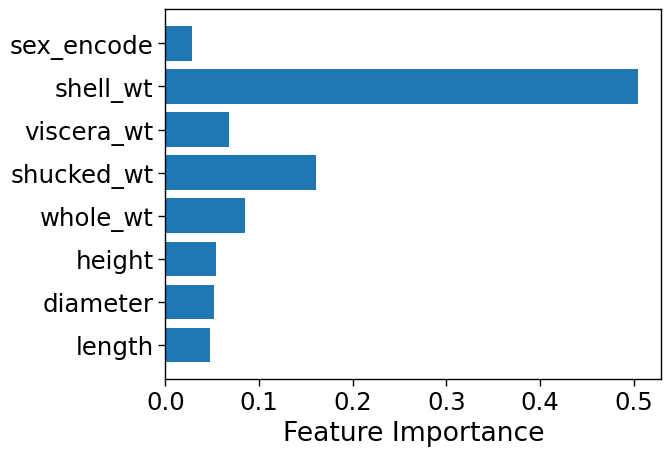

In [124]:
# feature importance importance 

plt.barh(width =rf.feature_importances_, y = X.columns);
plt.xlabel('Feature Importance')

> Observations
* The number of `shell weight` have the highest importance, hence considered the most important features for predicting the age of abalones, followed by `shucked weight`.
* This is at par with the observations made in the PLSR model.

## Conclusions:
>* The `shucked weight` of the abalone, is the most predictive feature of the age of an abalone, as evidenced by the two models explored.
>* The RF and PLSR had similar Test R-sq and MSE predictions.
>* The RF performed marginally better in predicting the age of abalones.